<div class="alert alert-block alert-success" style="font-size:40px; font-style: italic;">
            <b> Libraries </b>
     
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<div class="alert alert-block alert-warning" style="font-size:40px; font-style: italic;">
            <b> Loading the Dataset </b>
     
</div>

In [3]:
df=pd.read_csv('Restaurant_reviews.csv')

In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 10000 rows and 8 columns


In [5]:
df.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0,NaN
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0,NaN
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0,NaN
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0,NaN
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0,NaN


<div class="alert alert-block alert-info" style="font-size:40px; font-style: italic;">
            <b> Exploring the Dataset </b>
     
</div>

In [6]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Restaurant       0
Reviewer        38
Review          45
Rating          38
Metadata        38
Time            38
Pictures         0
7514          9999
dtype: int64


In [7]:
df.drop(["Restaurant",'Reviewer','Metadata','Time','Pictures','7514'],inplace=True,errors='ignore')

C:\Users\DELL\AppData\Local\Temp\ipykernel_17140\836305291.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Rating',palette='viridis')


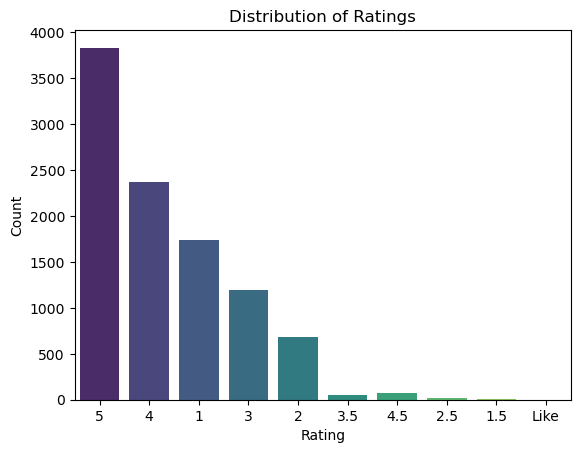

In [8]:
sns.countplot(data=df,x='Rating',palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<div class="alert alert-block alert-danger" style="font-size:40px; font-style: italic;">
            <b> Text Processing </b>
     
</div>

In [9]:
def preprocess_text(text):
    if not isinstance(text,str):
        return ""
    stop_words = set(stopwords.words('english'))
    tokens=word_tokenize(text.lower())
    tokens=[word for word in tokens if word not in stop_words and word.isalpha()]
    return " ".join(tokens)
df['Review']=df['Review'].fillna("")
df['Cleaned_Review']=df['Review'].apply(preprocess_text)

df[['Review','Cleaned_Review']].head()

,Review,Cleaned_Review
0,"The ambience was good, food was quite good . h...",ambience good food quite good saturday lunch c...
1,Ambience is too good for a pleasant evening. S...,ambience good pleasant evening service prompt ...
2,A must try.. great food great ambience. Thnx f...,must try great food great ambience thnx servic...
3,Soumen das and Arun was a great guy. Only beca...,soumen das arun great guy behavior sincerety g...
4,Food is good.we ordered Kodi drumsticks and ba...,food ordered kodi drumsticks basket mutton bir...


In [10]:
text_combined = " ".join(df['Cleaned_Review'])
wordcloud = WordCloud(width=1500,height=700,background_color='white').generate(text_combined)

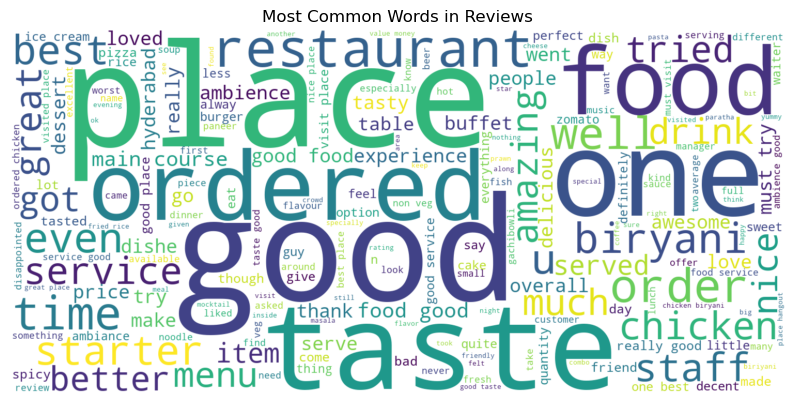

In [11]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

<div class="alert alert-block alert-success" style="font-size:40px; font-style: italic;">
            <b> Feature Extraction </b>
     
</div>

In [21]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Cleaned_Review']).toarray()
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print(f"Training set size: {X_train.shape[0]} rows")
print(f"Test set size: {X_test.shape[0]} rows")

Training set size: 7968 rows
Test set size: 1993 rows


<div class="alert alert-block alert-warning" style="font-size:40px; font-style: italic;">
            <b> Model Training and Evaluation </b>
     
</div>

In [23]:
print('Unique Ratings Before Cleaning:')
print(df['Rating'].value_counts())

Unique Ratings Before Cleaning:
Rating
5    3832
4    2489
1    1735
3    1193
2     712
Name: count, dtype: int64


In [24]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [25]:
df=df[df['Rating'].apply(lambda x: str(x).replace('.','',1).isdigit())]

In [26]:
df['Rating'] = df['Rating'].astype(float)
df['Rating'] = df['Rating'].round().astype(int)

In [27]:
df = df.dropna(subset=['Rating'])

In [28]:
y_prediction = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_prediction))

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.80      0.73       338
           2       0.27      0.18      0.22       151
           3       0.38      0.36      0.37       228
           4       0.49      0.44      0.46       490
           5       0.73      0.78      0.75       786

    accuracy                           0.61      1993
   macro avg       0.51      0.51      0.51      1993
weighted avg       0.59      0.61      0.59      1993



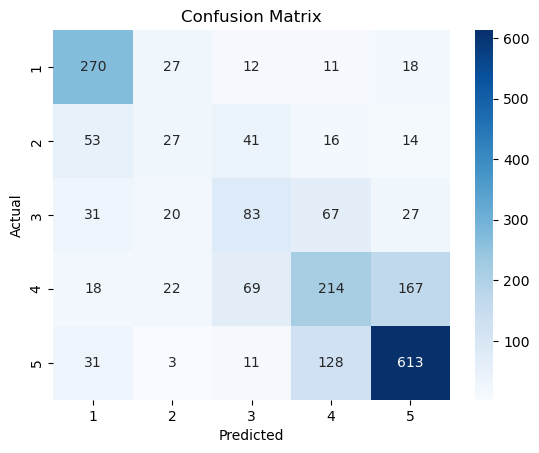

In [29]:
Confusion_matrix = confusion_matrix(y_test, y_prediction)
sns.heatmap(Confusion_matrix, annot=True, fmt='d',cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [30]:
accuracy = accuracy_score(y_test, y_prediction)
print(f"Model Accuracy: {accuracy: .2f}")

Model Accuracy:  0.61


<div class="alert alert-block alert-info" style="font-size:40px; font-style: italic;">
            <b>  Optional: Sentiment Analysis Visualization </b>
     
</div>

In [31]:
df['Sentiment'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else 'Negative')

C:\Users\DELL\AppData\Local\Temp\ipykernel_17140\3974343047.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


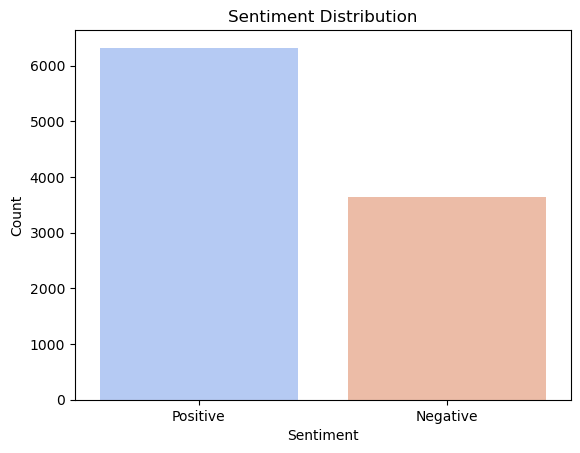

In [32]:
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [33]:
# Balance the dataset
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']
balanced_df = pd.concat([positive_reviews.sample(len(negative_reviews)), negative_reviews])

# Update X and y
X = vectorizer.fit_transform(balanced_df['Cleaned_Review']).toarray()
y = balanced_df['Rating']


In [34]:
def test_custom_review(review, model, vectorizer):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(review.lower())
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    cleaned_review = " ".join(tokens)
    review_vector = vectorizer.transform([cleaned_review]).toarray()
    
    # Predict sentiment
    prediction = model.predict(review_vector)
    sentiment = 'Positive' if prediction[0] >= 4 else 'Negative'
    
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")


In [35]:
custom_review = "Very Disgusting"
test_custom_review(custom_review, model, vectorizer)


Review: Very Disgusting
Predicted Sentiment: Negative


In [36]:
custom_review = "Delicious and very good"
test_custom_review(custom_review, model, vectorizer)

Review: Delicious and very good
Predicted Sentiment: Positive
